In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
warnings.filterwarnings('ignore')

import matplotlib
font = {'size'   : 12}
matplotlib.rc('font', **font)

In [2]:
# dnm[:,1] = our algorithm with real V
# dnm[:,0] = classic SVD

neg,avs,avm,avf,ri,rd = np.zeros((8,8)),np.zeros((8,8)),np.zeros((8,8)),np.zeros((8,8)),np.zeros((8,8)),np.zeros((8,8))
for m in range(8):
    for n in range(8):
        dnm = np.load('data/k2_r/m' + str(m+3) + '_n' + str(n+3) + '.npy')
        diff = dnm[:,1] - dnm[:,0]
        neg[m,n] = np.sum(diff<0)
        avs[m,n] = np.mean(dnm[:,0])
        avf[m,n] = np.mean(dnm[:,1])
        ri[m,n] = (avf[m,n] - avs[m,n]) / avs[m,n]
        
np.sum(neg)

624.0

0.6048048022144659

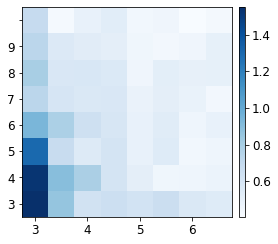

In [3]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
im = ax.imshow(ri, cmap='Blues', vmin=np.min(ri), vmax=np.max(ri), origin='lower');

xtk = 2+np.arange(0,8)
ax.set_xticklabels(xtk)
ax.set_yticklabels(xtk);
div = make_axes_locatable(ax)
cax = div.append_axes("right", size="3%", pad=0.1)
plt.colorbar(im, cax=cax);
np.mean(ri)

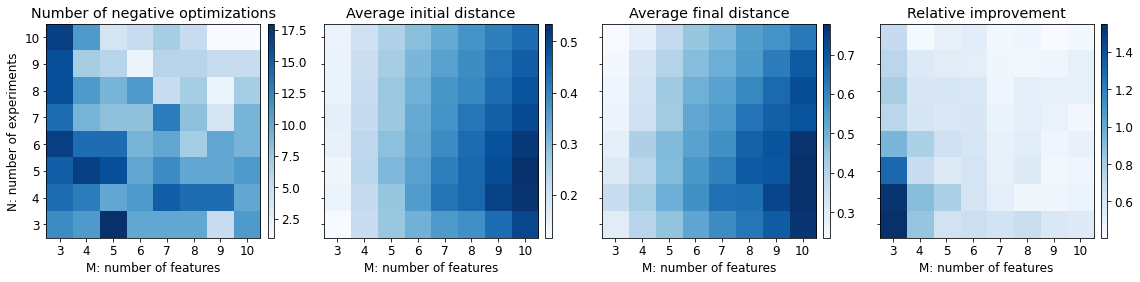

In [4]:
fig, ax = plt.subplots(1,4,figsize=(16,4),sharey=True)

im0 = ax[0].imshow(neg, cmap='Blues', vmin=np.min(neg), vmax=np.max(neg), origin='lower')
ax[0].set_title('Number of negative optimizations')
im1 = ax[1].imshow(avs, cmap='Blues', vmin=np.min(avs), vmax=np.max(avs), origin='lower')
ax[1].set_title('Average initial distance')
im2 = ax[2].imshow(avf, cmap='Blues', vmin=np.min(avf), vmax=np.max(avf), origin='lower')
ax[2].set_title('Average final distance')
im3 = ax[3].imshow(ri, cmap='Blues', vmin=np.min(ri), vmax=np.max(ri), origin='lower')
ax[3].set_title('Relative improvement')

ax[0].set_ylabel('N: number of experiments');
iml = [im0,im1,im2,im3]
xtk = 3+np.arange(0,8)
for i in range(4):
    a = ax[i]
    a.set_xticks(np.arange(0,8))
    a.set_yticks(np.arange(0,8))
    a.set_xticklabels(xtk)
    a.set_yticklabels(xtk);
    a.set_xlabel('M: number of features')
    
    div = make_axes_locatable(a)
    cax = div.append_axes("right", size="3%", pad=0.1)
    plt.colorbar(iml[i], cax=cax);
    
fig.tight_layout()

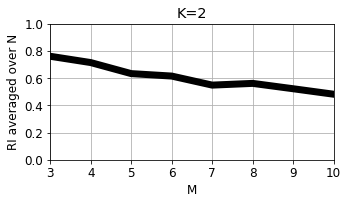

In [5]:
xtk = np.arange(3,11)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(xtk, np.mean(ri, axis=1), color = 'k', lw=7)
ax.set_ylim(0,1);
ax.set_xlim(3,10);
ax.set_ylabel('RI averaged over N');
ax.set_xlabel('M');
ax.set_title('K=2')
ax.set_xticks(xtk)
ax.grid(True)
fig.tight_layout()

In [6]:
fig.savefig('figures/k2-average-r.pdf')

In [7]:
np.mean(ri, axis=1)

array([0.76079006, 0.7145573 , 0.63337178, 0.61534257, 0.54886344,
       0.56155431, 0.52210619, 0.48185277])

In [8]:
np.save('data/ri/ri2_r.npy', ri)
print(ri)

[[1.55087531 0.85934669 0.62383566 0.65594721 0.62022654 0.65811961
  0.57331703 0.54465245]
 [1.525377   0.89404911 0.79002309 0.61047732 0.51703638 0.44685105
  0.45832296 0.47432149]
 [1.29806637 0.6758599  0.55455091 0.6057312  0.49373333 0.54595613
  0.43798981 0.45508657]
 [0.93386059 0.7841881  0.63847163 0.58917981 0.49067831 0.53770652
  0.4587922  0.48986345]
 [0.73204788 0.5965097  0.57312962 0.57915187 0.47900462 0.5129458
  0.48377632 0.4343417 ]
 [0.79743573 0.57963192 0.58198287 0.56521367 0.45190688 0.51990331
  0.49577573 0.50058435]
 [0.73004212 0.56161374 0.53312702 0.51425578 0.44838539 0.43636038
  0.45073289 0.50233223]
 [0.69076808 0.42219878 0.49093723 0.52818623 0.4374974  0.4535317
  0.40547111 0.42623158]]
